Exploring Happiness and Acohol Consumption

DESCRIPTION

QUESTIONS

Core Question: 
    
    Is alcohol consumption associated with national happiness?

Analytical Questions:
    
    Does total alcohol consumption correlate with happiness?

    Do different types of alcohol (beer/wine/spirits) relate differently to happiness?

    Does the relationship change when controlling for GDP, HDI, or region?
    
Reflections:
   
    Are observed relationships driven by wealth or cultural factors rather than alcohol itself?

DATASET OVERVIEW & DEFINITIONS

HappinessScore:
    
    A metric measured in 2016 by asking the sampled people the question: "How would you rate your happiness
    
HDI:
    
    Human Development Index by United Nations Development Programme
    
GDP_PerCapita:
    
    Gross Domestic Product index
    
Beer_PerCapita, Spirt_PerCapita, Wine_PerCapita:

    Conumption of alcohol in liters per capita 


In [1]:
#Setup
import pandas as pd
import numpy as np
dataset = pd.read_csv('HappinessAlcoholConsumption.csv')


In [2]:
#inspect the dataseet
dataset.info()
dataset.describe()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           122 non-null    object 
 1   Region            122 non-null    object 
 2   Hemisphere        122 non-null    object 
 3   HappinessScore    122 non-null    float64
 4   HDI               122 non-null    int64  
 5   GDP_PerCapita     122 non-null    float64
 6   Beer_PerCapita    122 non-null    int64  
 7   Spirit_PerCapita  122 non-null    int64  
 8   Wine_PerCapita    122 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 8.7+ KB


,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97


Column names were standardized to use snake_case for readability and consistency.

In [3]:
#Renaming Columns for consistancy
dataset = dataset.rename(columns = {'HappinessScore':'Happiness_Score',
                   'GDP_PerCapita':'GDP_Per_Capita', 
                   'Beer_PerCapita':'Beer_Per_Capita', 
                   'Spirit_PerCapita':'Spirit_Per_Capita',
                   'Wine_PerCapita':'Wine_Per_Capita'})

In [4]:
#Does total alcohol consumption correlate with happiness?

dataset['Total_Alcohol_Consumption'] = dataset[['Beer_Per_Capita', 'Spirit_Per_Capita', 'Wine_Per_Capita']].sum(axis=1)
happiness_to_consumption = dataset[['Country', 'Happiness_Score', 'Total_Alcohol_Consumption']].sort_values('Happiness_Score', ascending=False)

happiness_to_consumption.head(10)


,Country,Happiness_Score,Total_Alcohol_Consumption
0,Denmark,7.526,583
1,Switzerland,7.509,565
2,Iceland,7.501,372
3,Norway,7.498,369
4,Finland,7.413,493
5,Canada,7.404,462
6,Netherlands,7.339,529
7,New Zealand,7.334,457
8,Australia,7.313,545
9,Sweden,7.291,398


In [5]:
#Determining the corrolation factor
happiness_total = happiness_to_consumption['Happiness_Score'].corr(happiness_to_consumption['Total_Alcohol_Consumption'])

happiness_total

0.5474609600344386

<AxesSubplot:xlabel='Total_Alcohol_Consumption', ylabel='Happiness_Score'>

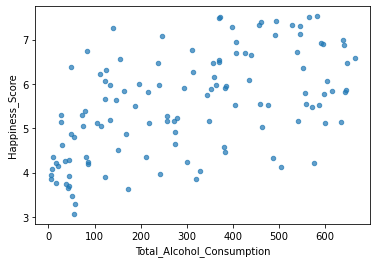

In [6]:
happiness_to_consumption.plot(
    x='Total_Alcohol_Consumption',
    y='Happiness_Score',
    kind='scatter',
    alpha=0.7
)

In [7]:
#Looking for outliers
happiness_to_consumption['Happiness_Score'].describe()


count    122.000000
mean       5.524828
std        1.148736
min        3.069000
25%        4.528250
50%        5.542000
75%        6.477000
max        7.526000
Name: Happiness_Score, dtype: float64

In [8]:
happiness_to_consumption['Total_Alcohol_Consumption'].describe()


count    122.000000
mean     300.762295
std      205.128505
min        5.000000
25%      112.500000
50%      298.000000
75%      473.500000
max      665.000000
Name: Total_Alcohol_Consumption, dtype: float64

In [9]:
less_alcohol = happiness_to_consumption['Total_Alcohol_Consumption'] < 112.5
more_happy = happiness_to_consumption['Happiness_Score'] > 6.4
outliers = happiness_to_consumption[more_happy & less_alcohol]
outliers

,Country,Happiness_Score,Total_Alcohol_Consumption
20,Singapore,6.739,83


Although percentile-based thresholds identify only one country as a high-happiness, low-consumption outlier, this reflects the strictness of the filtering criteria rather than the absence of deviation.

In [10]:
slope, intercept = np.polyfit(
    happiness_to_consumption['Total_Alcohol_Consumption'],
    happiness_to_consumption['Happiness_Score'],
    1
)
# Predicted happiness
happiness_to_consumption['Predicted_Happiness'] = (
    intercept + slope * happiness_to_consumption['Total_Alcohol_Consumption']
)

# Residuals
happiness_to_consumption['Residual'] = (
    happiness_to_consumption['Happiness_Score'] - happiness_to_consumption['Predicted_Happiness']
)

# Largest positive residuals = happier than expected
outliers = happiness_to_consumption.sort_values('Residual', ascending=False).head(10)
outliers

,Country,Happiness_Score,Total_Alcohol_Consumption,Predicted_Happiness,Residual
10,Israel,7.267,141,5.035025,2.231975
20,Singapore,6.739,83,4.857207,1.881793
3,Norway,7.498,369,5.734033,1.763967
2,Iceland,7.501,372,5.743230,1.757770
13,Costa Rica,7.087,247,5.360002,1.726998
32,Qatar,6.375,50,4.756034,1.618966
26,United Arab Emirates,6.573,156,5.081012,1.491988
9,Sweden,7.291,398,5.822942,1.468058
5,Canada,7.404,462,6.019154,1.384846
34,Guatemala,6.324,124,4.982906,1.341094


The moderate positive correlation (r = 0.57) suggests that countries with higher alcohol consumption tend to report higher happiness scores. However, substantial outliers and potential confounding factors imply that alcohol consumption itself is unlikely to be the direct cause of national happiness. Countries with the largest positive residuals are substantially happier than predicted by alcohol consumption alone, indicating that factors beyond alcohol intake play a significant role in national happiness.

In [11]:
#Do different types of alcohol (beer/wine/spirits) relate differently to happiness?

happiness_to_beer = dataset['Happiness_Score'].corr(dataset['Beer_Per_Capita'])
happiness_to_beer

0.49336720477895324

In [12]:
happiness_to_spirits = dataset['Happiness_Score'].corr(dataset['Spirit_Per_Capita'])
happiness_to_spirits

0.25639894608701125

In [13]:
happiness_to_wine = dataset['Happiness_Score'].corr(dataset['Wine_Per_Capita'])
happiness_to_wine

0.4505886386267422

<AxesSubplot:>

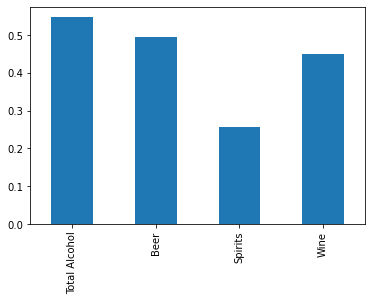

In [14]:
correlations = pd.Series(
    [happiness_total, happiness_to_beer, happiness_to_spirits, happiness_to_wine],
    index=['Total Alcohol', 'Beer', 'Spirits', 'Wine']
)

correlations.plot(kind='bar')


Total alcohol consumption exhibits the strongest correlation with happiness, followed by wine and beer, while spirits show the weakest association by a noticable margin.

In [15]:
#Does the relationship change when controlling for GDP, HDI, or region?
dataset['GDP_Per_Capita'].describe()

count    122.000000
mean      91.482836
std      209.577313
min        1.029000
25%        4.134250
50%       12.016000
75%       41.990000
max      953.000000
Name: GDP_Per_Capita, dtype: float64

In [18]:
high_GDP = dataset['GDP_Per_Capita'] >= 41
med_GDP = (dataset['GDP_Per_Capita'] >= 4) & (dataset['GDP_Per_Capita'] < 41)
low_GDP = dataset['GDP_Per_Capita'] < 4



In [22]:
wealthy_nations = dataset[high_GDP]
wealthy_nations_correlation = wealthy_nations['Happiness_Score'].corr(wealthy_nations['Total_Alcohol_Consumption'])
wealthy_nations_correlation

0.8449267017223859

In [23]:
med_nations = dataset[med_GDP]
med_nations_correlation = med_nations['Happiness_Score'].corr(med_nations['Total_Alcohol_Consumption'])
med_nations_correlation

-0.012921264605721622

In [24]:
poor_nations = dataset[low_GDP]
poor_nations_correlation = poor_nations['Happiness_Score'].corr(poor_nations['Total_Alcohol_Consumption'])
poor_nations_correlation

0.14169187681513434

In [30]:
wealth_correlations = [wealthy_nations_correlation, med_nations_correlation, poor_nations_correlation]

In [25]:
dataset['HDI'].describe()

count    122.000000
mean     740.877049
std      149.846124
min      351.000000
25%      663.750000
50%      757.500000
75%      861.500000
max      951.000000
Name: HDI, dtype: float64

In [26]:
high_HDI = dataset['HDI'] >=861
med_HDI = (dataset['HDI'] >= 757) & (dataset['HDI'] < 861)
low_HDI = dataset['HDI'] <= 663

In [27]:
high_develpment_nations = dataset[high_HDI]
high_develpment_nations_correlation = high_develpment_nations['Happiness_Score'].corr(high_develpment_nations['Total_Alcohol_Consumption'])
high_develpment_nations_correlation

0.11773963604540796

In [28]:
med_develpment_nations = dataset[med_HDI]
med_develpment_nations_correlation = med_develpment_nations['Happiness_Score'].corr(med_develpment_nations['Total_Alcohol_Consumption'])
med_develpment_nations_correlation

-0.11384833172664913

In [29]:
low_develpment_nations = dataset[low_HDI]
low_develpment_nations_correlation = low_develpment_nations['Happiness_Score'].corr(low_develpment_nations['Total_Alcohol_Consumption'])
low_develpment_nations_correlation

0.19352919010569555

In [31]:
development_correlations = [high_develpment_nations_correlation, med_develpment_nations_correlation, low_develpment_nations_correlation]

['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa']
